In [1]:
# GerryChain is a library for using Markov Chain Monte Carlo methods to study the problem of political redistricting. 
#   Development of the library began during the 2018 Voting Rights Data Institute (VRDI).
#
# Install instructions: https://gerrychain.readthedocs.io/en/latest/user/install.html

from gerrychain import Graph

In [2]:
# Read Oklahoma county graph from the json file "OK_county.json"
filepath = 'C:\\districting-data\\'
filename = 'OK_county.json'

# GerryChain has a built-in function for reading graphs of this type:
G = Graph.from_json( filepath + filename )

In [3]:
# Print the nodes
print("The Oklahoma county graph has nodes",G.nodes)

The Oklahoma county graph has nodes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]


In [4]:
# For each node, print the node #, county name, and its population
for node in G.nodes:
    name = G.nodes[node]["NAME10"]
    population = G.nodes[node]['TOTPOP']
    print("Node",node,"represents",name,"County and its population in year 2010 was",population)

Node 0 represents Payne County and its population in year 2010 was 77350
Node 1 represents Caddo County and its population in year 2010 was 29600
Node 2 represents Delaware County and its population in year 2010 was 41487
Node 3 represents Marshall County and its population in year 2010 was 15840
Node 4 represents Greer County and its population in year 2010 was 6239
Node 5 represents Coal County and its population in year 2010 was 5925
Node 6 represents Seminole County and its population in year 2010 was 25482
Node 7 represents Murray County and its population in year 2010 was 13488
Node 8 represents Jefferson County and its population in year 2010 was 6472
Node 9 represents Tillman County and its population in year 2010 was 7992
Node 10 represents McIntosh County and its population in year 2010 was 20252
Node 11 represents Choctaw County and its population in year 2010 was 15205
Node 12 represents Harper County and its population in year 2010 was 3685
Node 13 represents Grant County 

In [6]:
# What nodes (counties) neighbor node 0 (Payne County)?
neighbors = [j for j in G.neighbors(0)]
neighbor_names = [G.nodes[j]["NAME10"] for j in G.neighbors(0)]
print("The nodes that neighbor node 0 are:",neighbors)
print("The counties that neighbor Payne County are:",neighbor_names)

The nodes that neighbor node 0 are: [66, 57, 61, 73, 27]
The counties that neighbor Payne County are: ['Lincoln', 'Creek', 'Logan', 'Pawnee', 'Noble']


In [7]:
# GeoPandas is an open source project to make working with geospatial data in python easier. 
#  GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. 
#  Geometric operations are performed by shapely. Geopandas further depends on fiona for file 
#  access and matplotlib for plotting.
#
# The goal of GeoPandas is to make working with geospatial data in python easier. It combines the 
# capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level 
# interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in 
# python that would otherwise require a spatial database such as PostGIS.

import geopandas as gpd

In [8]:
# Read Oklahoma county shapefile from "OK_county.shp"
filepath = 'C:\\districting-data\\'
filename = 'OK_county.shp'

# Read geopandas dataframe from file
df = gpd.read_file( filepath + filename )  

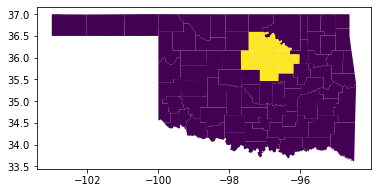

In [9]:
# What would it look like on a map if Payne County (node 0) and its neighbors were a district?
district = [ 0 ] + [ j for j in G.neighbors(0) ]
district_geoids = [ G.nodes[i]["GEOID10"] for i in district ]

# For nodes in district, set their 'selected' values to 1. Set others to zero.
df['selected'] = [1 if df['GEOID10'][u] in district_geoids else 0 for u in G.nodes]
            
my_figure = df.plot(column='selected').get_figure()